In [1]:
import os, sys
import re
import datetime
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

plt.rcParams.update({'font.size': 14})

# Comparison of performance in each arch/device

In [2]:
import json
f = open('arch_compare_result.json')
raw_data = json.load(f)

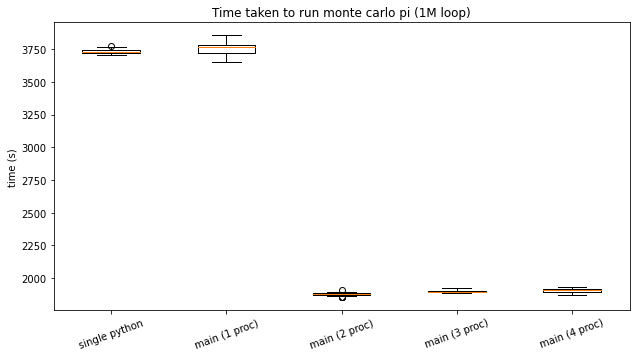

In [3]:
data = []
data.append(raw_data["noVolpy"])
data.append(raw_data["main"]["1"]["total"])
data.append(raw_data["main"]["2"]["total"])
data.append(raw_data["main"]["3"]["total"])
data.append(raw_data["main"]["4"]["total"])

fig = plt.figure(figsize =(8, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken to run monte carlo pi (1M loop)')
xtick = ["single python", "main (1 proc)", "main (2 proc)", "main (3 proc)", "main (4 proc)"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (s)')
# plt.axvline(x=2.5)
fig.show()

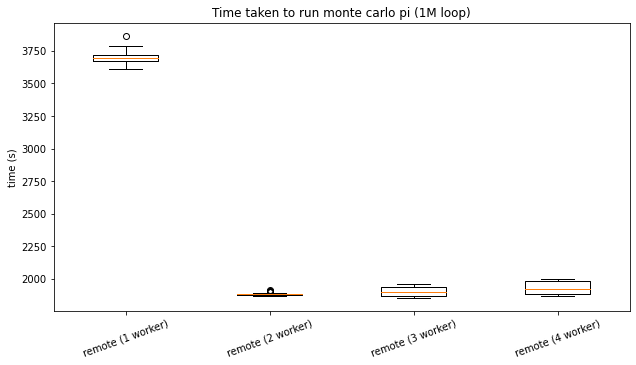

In [4]:
data = []
data.append(raw_data["remote"]["1"]["total"])
data.append(raw_data["remote"]["2"]["total"])
data.append(raw_data["remote"]["3"]["total"])
data.append(raw_data["remote"]["4"]["total"])

fig = plt.figure(figsize =(8, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken to run monte carlo pi (1M loop)')
xtick = ["remote (1 worker)", "remote (2 worker)", "remote (3 worker)", "remote (4 worker)"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (s)')
# plt.axvline(x=2.5)
fig.show()

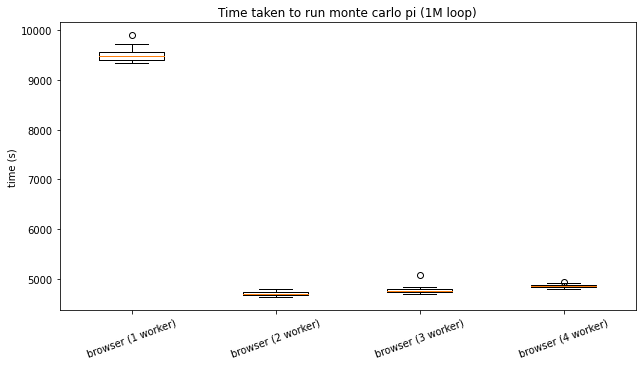

In [5]:
data = []
data.append(raw_data["browser"]["1"]["total"])
data.append(raw_data["browser"]["2"]["total"])
data.append(raw_data["browser"]["3"]["total"])
data.append(raw_data["browser"]["4"]["total"])

fig = plt.figure(figsize =(8, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken to run monte carlo pi (1M loop)')
xtick = ["browser (1 worker)", "browser (2 worker)", "browser (3 worker)", "browser (4 worker)"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (s)')
# plt.axvline(x=2.5)
fig.show()

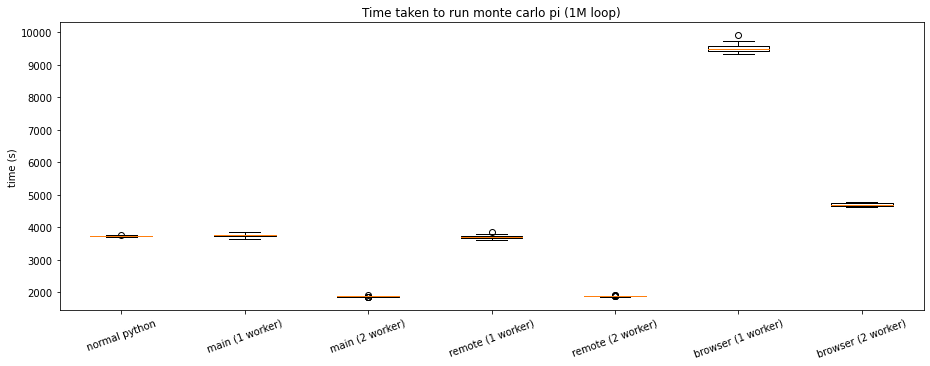

In [6]:
data = []
data.append(raw_data["noVolpy"])
data.append(raw_data["main"]["1"]["total"])
data.append(raw_data["main"]["2"]["total"])
data.append(raw_data["remote"]["1"]["total"])
data.append(raw_data["remote"]["2"]["total"])
data.append(raw_data["browser"]["1"]["total"])
data.append(raw_data["browser"]["2"]["total"])

fig = plt.figure(figsize =(12, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken to run monte carlo pi (1M loop)')
xtick = ["normal python", "main (1 worker)", "main (2 worker)", "remote (1 worker)", "remote (2 worker)", "browser (1 worker)", "browser (2 worker)"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (s)')
# plt.axvline(x=2.5)
fig.show()

# Comparison of real work with varied number of workers

In [7]:
import json
f = open('num_compare_result.json')
raw_data = json.load(f)

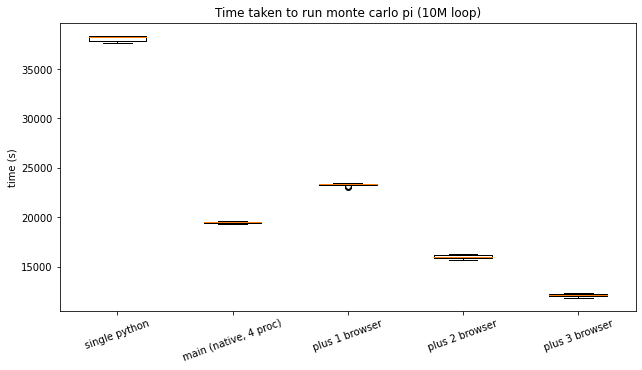

In [8]:
data = []
data.append(raw_data["pi"]["single"])
data.append(raw_data["pi"]["main"]["total"])
data.append(raw_data["pi"]["browser_1"]["total"])
data.append(raw_data["pi"]["browser_2"]["total"])
data.append(raw_data["pi"]["browser_3"]["total"])

fig = plt.figure(figsize =(8, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken to run monte carlo pi (10M loop)')
xtick = ["single python", "main (native, 4 proc)", "plus 1 browser", "plus 2 browser", "plus 3 browser"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (s)')
# plt.axvline(x=2.5)
fig.show()

In [9]:
from itertools import chain

data_x = []
data_y = []
def addScatterHistPlot(data_x, data_y, raw_data, ind):
    data_y += raw_data
    data_x += [ind]*len(raw_data)

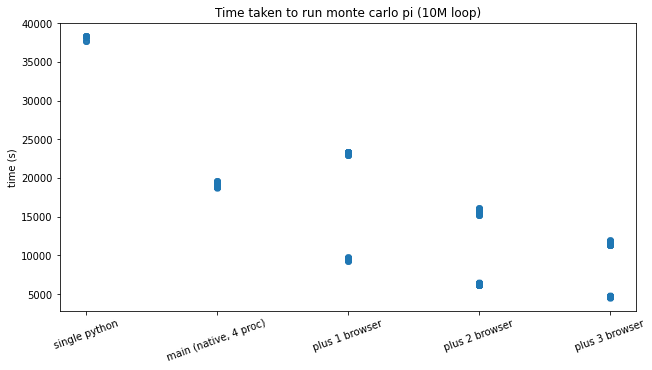

In [10]:
addScatterHistPlot(data_x, data_y, raw_data["pi"]["single"], 1)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["main"]["ea"])), 2)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["browser_1"]["ea"])), 3)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["browser_2"]["ea"])), 4)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["browser_3"]["ea"])), 5)

fig = plt.figure(figsize =(8, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.scatter(data_x, data_y, alpha=0.3)
ax.set_title('Time taken to run monte carlo pi (10M loop)')
xtick = ["single python", "main (native, 4 proc)", "plus 1 browser", "plus 2 browser", "plus 3 browser"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (s)')
# plt.axvline(x=2.5)
fig.show()

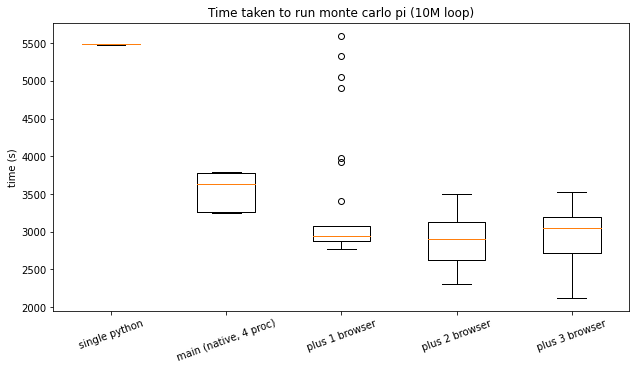

In [11]:
data = []
data.append(raw_data["hash"]["single"])
data.append(raw_data["hash"]["main"])
data.append(raw_data["hash"]["browser_1"])
data.append(raw_data["hash"]["browser_2"])
data.append(raw_data["hash"]["browser_3"])

fig = plt.figure(figsize =(8, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken to run monte carlo pi (10M loop)')
xtick = ["single python", "main (native, 4 proc)", "plus 1 browser", "plus 2 browser", "plus 3 browser"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (s)')
# plt.axvline(x=2.5)
fig.show()